# ストロガッツ 非線形ダイナミクスとカオス 演習2.8.3-2.8.5

In [14]:
import japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from ode_int import NumIntegral

# 2.8.3

問：この問題のゴールは、初期値問題$\dot{x}=-x, x(0)=1$に対してオイラー法を検証することである。

### (a) 問題を解析的に解け。$x(1)$の厳密な値は何か？

- 解答

    $\dot{x}=-x$を解くと、$x=C_1\exp{[-t]}$  ($C_1$: 任意定数)となる。

    - 計算

        $$
        \begin{split}
        \frac{\rm{d}x}{\rm{d}t}&=-x\\
        \frac{\rm{d}x}{x}&=-\rm{d}t\\
        \ln{x}&=-t + C_0\\
        x&=C_1\exp{[-t]}
        \end{split}
        $$


    初期値$x(0)=1$を代入し、$C_1=1$が得られる。よって、解は$x=\exp{[-t]}$

    以上より、$x(1)=\exp{[-1]}=1/e$

#### (b) ステップ幅$\Delta t = 1$ のオイラー法を用いて$x(1)$を数値的に見積もれ。この結果を$\hat{x}(1)$とよぶ。次に$\Delta t = 10^{-n}, n=1, 2, 3, 4$ を用いて、これを繰り返せ。

- 解答

    以下のコードにより、オイラー法を実行する。

    $\Delta t$を変化させ、オイラー法により$\hat{x}(1)$を求めた結果以下のようになった。

    $\Delta t = 1$：$\hat{x}(1)=0$

    $\Delta t = 10^{-1}$：$\hat{x}(1)=0.348678$

    $\Delta t = 10^{-2}$：$\hat{x}(1)=0.366032$

    $\Delta t = 10^{-3}$：$\hat{x}(1)=0.367695$

    $\Delta t = 10^{-4}$：$\hat{x}(1)=0.367861$

In [8]:
# f(x)を定義
def x_dot(x: np.ndarray):
    return -1 * x

# 数値積分のパラメータ
algorithm = "euler_method"
x_0 = np.array([1])
t_0 = 0
step = 10 ** (-4)

dyn = NumIntegral()
# ダイナミクス初期化
dyn.initialize(x_0=x_0, t_0=t_0, x_dot=x_dot, step=step, algorithm=algorithm)
# 数値積分実行
dyn.run_integral(last_t=1)
# 推移を表示
dyn.transition_record.tail(3)

Numerical Integration Running Progress: 100%|██████████| 10000/10000 [00:00<00:00, 167230.33it/s]


,x1
0.9998,0.367935
0.9999,0.367898
1.0000,0.367861


#### (c) 誤差$E=|\hat{x}(1)-x(1)|$を$\Delta t$ の関数としてプロットせよ。次に、$\ln{E}$を$\ln{t}$に対してプロットせよ。そして、その結果を説明せよ。

- 解答

    以下のコードにより、誤差を計算し、プロットする。
    $\Delta t$を$10^{-4}$から$1$まで$10^{-4}$ずつ変化させ、オイラー法の誤差$E$を計算し、$\Delta t$に対してプロットしたところ、図1が得られた。
    また、$\Delta t$と$E$を対数変換したグラフが図2である。

100%|██████████| 10000/10000 [00:01<00:00, 5231.73it/s]


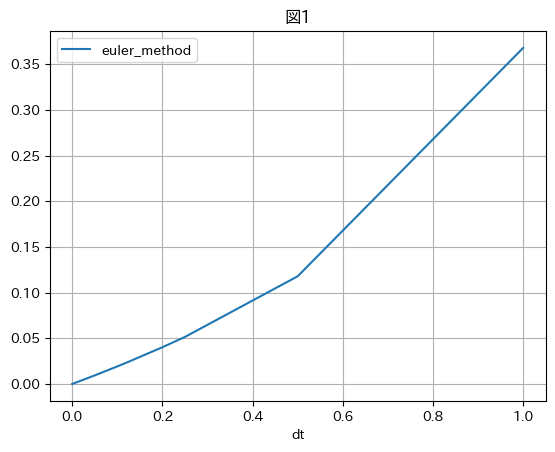

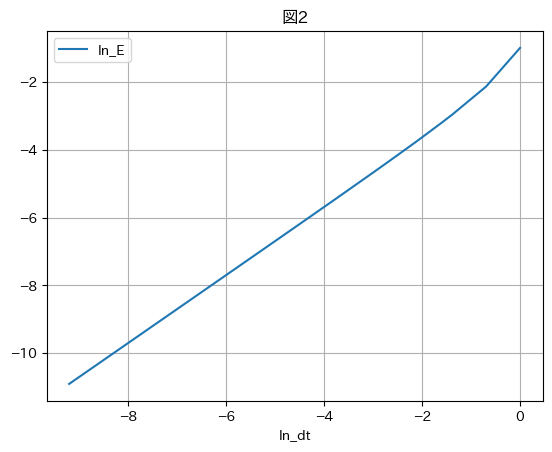

In [17]:
def x_dot(x: np.ndarray):
    return -1 * x

algorithm = "euler_method"
x_calc = 1 / np.e
x_0 = np.array([1])
t_0 = 0

x_error = []
dt = np.arange(10 ** (-4), 1 + 10 ** (-4), 10 ** (-4))
for _dt in tqdm(dt):
    dyn = NumIntegral()
    dyn.initialize(x_0=x_0, t_0=t_0, x_dot=x_dot, step=_dt, algorithm=algorithm)
    dyn.run_integral(last_t=1, progress_bar=False)
    if round(dyn.transition_record.index[-1], 4) == 1:
        x_hat = dyn.transition_record["x1"].values[-1]
        x_error.append(np.array([_dt, abs(x_hat - x_calc)]))

error_df = pd.DataFrame(x_error, columns=["dt", algorithm]).set_index("dt").sort_index()
error_df.plot(title="図1")
plt.grid()
plt.show()

ln_error_df = pd.DataFrame(np.log(error_df[algorithm].values), index=np.log(error_df.index), columns=["ln_E"])
ln_error_df.index.name = "ln_dt"
ln_error_df.plot(title="図2")
plt.grid()
plt.show()

# 2.8.4

問：2.8.3を、修正オイラー法を用いて再度行え。

#### (b)

- 解答

    以下のコードにより、修正オイラー法を実行する。
    $\Delta t$を変化させ、修正オイラー法により$\hat{x}(1)$を求めた結果以下のようになった。

    $\Delta t=1$：$\hat{x}(1)=0.5$

    $\Delta t=10^{-1}$：$\hat{x}(1)=0.368541$

    $\Delta t=10^{-2}$：$\hat{x}(1)=0.367886$

    $\Delta t=10^{-3}$：$\hat{x}(1)=0.367880$

    $\Delta t=10^{-4}$：$\hat{x}(1)=0.367879$

In [18]:
# f(x)を定義
def x_dot(x: np.ndarray):
    return -1 * x

# 数値積分のパラメータ
algorithm = "modified_euler_method"
x_0 = np.array([1])
t_0 = 0
step = 10 ** (-4)

dyn = NumIntegral()
# ダイナミクス初期化
dyn.initialize(x_0=x_0, t_0=t_0, x_dot=x_dot, step=step, algorithm=algorithm)
# 数値積分実行
dyn.run_integral(last_t=1)
# 推移を表示
dyn.transition_record.tail(3)

Numerical Integration Running Progress: 100%|██████████| 10000/10000 [00:00<00:00, 63485.23it/s]


,x1
0.9998,0.367953
0.9999,0.367916
1.0000,0.367879


#### (c)

- 解答

    以下のコードにより、誤差を計算し、プロットする。
    $\Delta t$を$10^{-4}$から$1$まで$10^{-4}$ずつ変化させ、修正オイラー法の誤差$E$を計算し、$\Delta t$に対してプロットしたところ、図3が得られた。
    また、$\Delta t$と$E$を対数変換したグラフが図4である。

100%|██████████| 10000/10000 [00:03<00:00, 3153.61it/s]


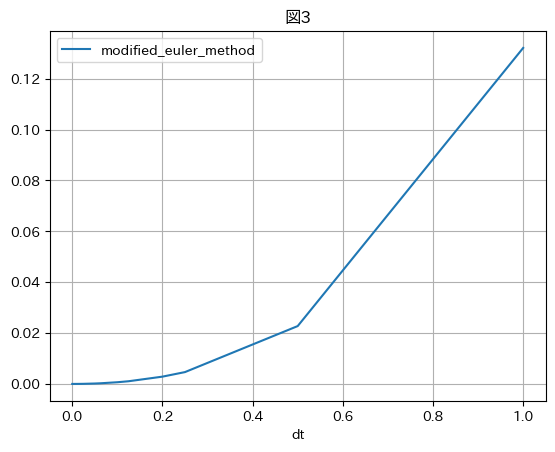

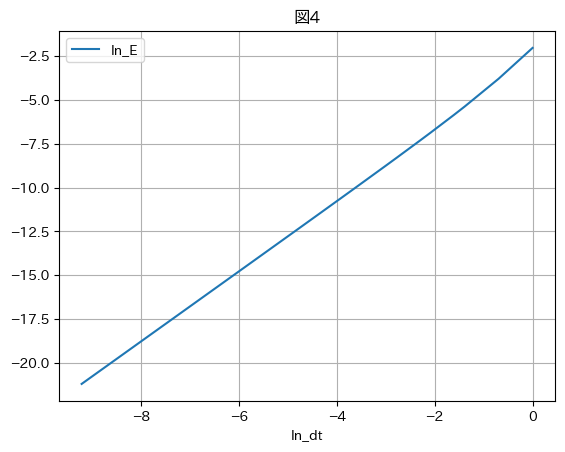

In [20]:
def x_dot(x: np.ndarray):
    return -1 * x

algorithm = "modified_euler_method"
x_calc = 1 / np.e
x_0 = np.array([1])
t_0 = 0

x_error = []
dt = np.arange(10 ** (-4), 1 + 10 ** (-4), 10 ** (-4))
for _dt in tqdm(dt):
    dyn = NumIntegral()
    dyn.initialize(x_0=x_0, t_0=t_0, x_dot=x_dot, step=_dt, algorithm=algorithm)
    dyn.run_integral(last_t=1, progress_bar=False)
    if round(dyn.transition_record.index[-1], 4) == 1:
        x_hat = dyn.transition_record["x1"].values[-1]
        x_error.append(np.array([_dt, abs(x_hat - x_calc)]))

error_df = pd.DataFrame(x_error, columns=["dt", algorithm]).set_index("dt").sort_index()
error_df.plot(title="図3")
plt.grid()
plt.show()

ln_error_df = pd.DataFrame(np.log(error_df[algorithm].values), index=np.log(error_df.index), columns=["ln_E"])
ln_error_df.index.name = "ln_dt"
ln_error_df.plot(title="図4")
plt.grid()
plt.show()

# 2.8.5

問：2.8.3を、ルンゲ-クッタ法を用いて再度行え。 

#### (b) 

- 解答

    以下のコードにより、ルンゲ-クッタ法を実行する。
    $\Delta t$を変化させ、ルンゲ-クッタ法により$\hat{x}(1)$を求めた結果以下のようになった。

    $\Delta t=1$：$\hat{x}(1)=0.375$

    $\Delta t=10^{-1}$：$\hat{x}(1)=0.367880$

    $\Delta t=10^{-2}$：$\hat{x}(1)=0.367879$

    $\Delta t=10^{-3}$：$\hat{x}(1)=0.367879$

    $\Delta t=10^{-4}$：$\hat{x}(1)=0.367879$

In [21]:
# f(x)を定義
def x_dot(x: np.ndarray):
    return -1 * x

# 数値積分のパラメータ
algorithm = "runge_kutta_method"
x_0 = np.array([1])
t_0 = 0
step = 10 ** (-4)

dyn = NumIntegral()
# ダイナミクス初期化
dyn.initialize(x_0=x_0, t_0=t_0, x_dot=x_dot, step=step, algorithm=algorithm)
# 数値積分実行
dyn.run_integral(last_t=1)
# 推移を表示
dyn.transition_record.tail(3)

Numerical Integration Running Progress: 100%|██████████| 10000/10000 [00:00<00:00, 30612.36it/s]


,x1
0.9998,0.367953
0.9999,0.367916
1.0000,0.367879


#### (c)

- 解答

    以下のコードにより、誤差を計算し、プロットする。
    $\Delta t$を$10^{-4}$から$1$まで$10^{-4}$ずつ変化させ、ルンゲ-クッタ法の誤差$E$を計算し、$\Delta t$に対してプロットしたところ、図5が得られた。
    また、$\Delta t$と$E$を対数変換したグラフが図6である。

100%|██████████| 10000/10000 [00:04<00:00, 2142.52it/s]


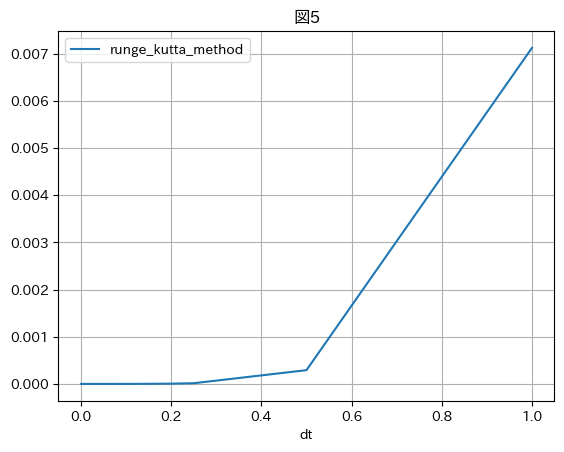

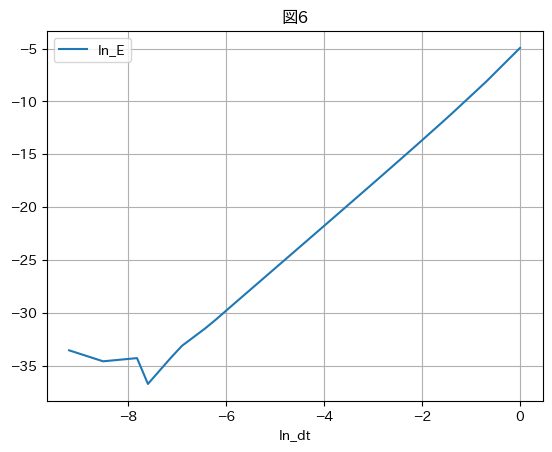

In [22]:
def x_dot(x: np.ndarray):
    return -1 * x

algorithm = "runge_kutta_method"
x_calc = 1 / np.e
x_0 = np.array([1])
t_0 = 0

x_error = []
dt = np.arange(10 ** (-4), 1 + 10 ** (-4), 10 ** (-4))
for _dt in tqdm(dt):
    dyn = NumIntegral()
    dyn.initialize(x_0=x_0, t_0=t_0, x_dot=x_dot, step=_dt, algorithm=algorithm)
    dyn.run_integral(last_t=1, progress_bar=False)
    if round(dyn.transition_record.index[-1], 4) == 1:
        x_hat = dyn.transition_record["x1"].values[-1]
        x_error.append(np.array([_dt, abs(x_hat - x_calc)]))

error_df = pd.DataFrame(x_error, columns=["dt", algorithm]).set_index("dt").sort_index()
error_df.plot(title="図5")
plt.grid()
plt.show()

ln_error_df = pd.DataFrame(np.log(error_df[algorithm].values), index=np.log(error_df.index), columns=["ln_E"])
ln_error_df.index.name = "ln_dt"
ln_error_df.plot(title="図6")
plt.grid()
plt.show()